# ***Adidas Sales Analytics – Retail & Profit Insight***

---



# **Project Overview**

This project focuses on analyzing Adidas retail sales data to gain meaningful insights into sales performance, profit trends, and retail strategies. The dataset captures transactions across multiple regions, product categories, and retailers, making it suitable for business analytics and decision-making.

The goal of this analysis is to understand sales drivers, profitability patterns, and regional performance, and to provide actionable insights that can help improve retail and marketing strategies.

🔹 Dataset Information

    Dataset Title: Adidas US Sales Dataset

    Source: Kaggle – Adidas Sales Dataset

    Time Period: 2020-2021

    Number of Rows: ~ Approximately 700 rows

    Number of Columns: 14

This dataset helps to analyse:
  
   1. Analyze total sales, units sold, and profit by region, retailer, and   product.
   2. Identify top-performing and underperforming regions/products.
   3. Understand the impact of pricing and sales method on profitability
   4. Discover monthly or seasonal trends in sales data.
   



# **Exploratory Data Analysis (EDA) – Adidas Sales Analytics**



This project focuses on Adidas Sales Analytics – Retail & Profit Insight, where Exploratory Data Analysis (EDA) is used to understand sales performance across different regions, retailers, product categories, and time periods. Using Python libraries such as pandas, numpy, matplotlib, and seaborn, the data is explored to identify key trends, patterns, and profit drivers. This analysis provides a foundation for making data-driven decisions to improve retail strategy and profitability.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AdidasSalesdata (1).xlsx to AdidasSalesdata (1).xlsx


## Data Loading and Initial Overview


For the Adidas dataset, we first load the data using Pandas and check its structure by viewing the number of rows, columns, data types, and basic statistics using functions like head(), info(), and describe(). This gives an initial understanding of the dataset’s size, quality, and key features.

In [ ]:
import pandas as pd


# Read Excel file (make sure file is uploaded in Colab)
df = pd.read_excel('AdidasSalesdata (1).xlsx')

# Display first rows
df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [ ]:
import pandas as pd

# 4. Show shape (rows, columns)
print("Dataset shape:", df.shape)

# 5. Show first 5 rows
print(df.head())




Dataset shape: (9648, 14)
      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2021-10-26  Northeast  Pennsylvania   
1  Foot Locker      1185732   2021-10-27  Northeast  Pennsylvania   
2  Foot Locker      1185732   2021-10-28  Northeast  Pennsylvania   
3  Foot Locker      1185732   2021-10-29  Northeast  Pennsylvania   
4  Foot Locker      1185732   2021-10-30  Northeast  Pennsylvania   

           City Gender Type   Product Category  Price per Unit  Units Sold  \
0  Philadelphia         Men            Apparel              55         125   
1  Philadelphia       Women            Apparel              45         225   
2  Philadelphia         Men    Street Footwear              45         475   
3  Philadelphia         Men  Athletic Footwear              45         125   
4  Philadelphia       Women    Street Footwear              35         175   

   Total Sales  Operating Profit  Operating Margin Sales Method  
0      68750.0          

In [ ]:
# Step 2: Initial overview of the dataset
print("Dataset Overview:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nData Types of Each Column:")
print(df.dtypes)
print("\nInitial Data Preview:")
print("\nTop 5 Rows:")
print(df.head())
print("\nBottom 5 Rows:")
print(df.tail())
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
Number of Rows: 9648
Number of Columns: 14

Data Types of Each Column:
Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Gender Type                 object
Product Category            object
Price per Unit               int64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

Initial Data Preview:

Top 5 Rows:
      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2021-10-26  Northeast  Pennsylvania   
1  Foot Locker      1185732   2021-10-27  Northeast  Pennsylvania   
2  Foot Locker      1185732   2021-10-28  Northeast  Pennsylvania   
3  Foot Locker      1185732   2021-10-29  Northeast  Pennsylvania   
4  Foot Locker      118573

# 2. Data Pre-processing

 ○ Handling missing values

 ○ Removing duplicates

 ○ Correcting data types

 ○ Creating derived columns

 ○ Filtering or aggregating data



In [ ]:
# Step 3: Handle Missing Values

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing categorical columns with their mode (most frequent value)
categorical_cols = ['Retailer', 'Region', 'State', 'City',
                    'Gender Type', 'Product Category', 'Sales Method']

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical columns with their median (better for skewed data)
numerical_cols = ['Price per Unit', 'Units Sold',
                  'Total Sales', 'Operating Profit', 'Operating Margin']

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# 'Retailer ID' is an identifier – forward fill if missing
if df['Retailer ID'].isnull().sum() > 0:
    df['Retailer ID'] = df['Retailer ID'].fillna(method='ffill')

# 'Invoice Date' (datetime) – fill missing with previous date
if df['Invoice Date'].isnull().sum() > 0:
    df['Invoice Date'] = df['Invoice Date'].fillna(method='ffill')

# Display updated missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

# Show first few rows
print("\nDataFrame after handling missing values:")
print(df.head())




Missing values in each column:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

Missing values after handling:
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

DataFrame after handling missing values:
      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2021-10-26  Northeast  Pennsylvania   
1  Foot Locker      1185732   2021-10-27  Northeast  Pennsylvania   
2  Foot Locker      1185732   2021-10-28  Nor

In [ ]:
# Step 4: Removing duplicates
# Checking for duplicates in the dataset
print("\nNumber of duplicates before removal:")
print(df.duplicated().sum())

# Dropping duplicate rows
df.drop_duplicates(inplace=True)

print("\nNumber of duplicates after removal:")
print(df.duplicated().sum())

# Step 5: Correcting Data Types
# Ensure 'Invoice Date' is in string format and remove spaces
df['Invoice Date'] = df['Invoice Date'].astype(str).str.strip()

# Convert 'Invoice Date' to datetime format (handling errors)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')

# Confirm changes
print("\nData types after correction:")
print(df.dtypes)




Number of duplicates before removal:
0

Number of duplicates after removal:
0

Data types after correction:
Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Gender Type                 object
Product Category            object
Price per Unit               int64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object


In [ ]:
# Step 6: Creating Derived Columns

# 1. Average Order Value (AOV)
# Formula: Total Sales / Units Sold
df['Average Order Value'] = df['Total Sales'] / df['Units Sold']

# 2. Profit per Unit
# Formula: Operating Profit / Units Sold
df['Profit per Unit'] = df['Operating Profit'] / df['Units Sold']

# 3. Profit Margin Percentage
# Formula: (Operating Profit / Total Sales) * 100
df['Profit Margin %'] = (df['Operating Profit'] / df['Total Sales']) * 100

# 4. Sales Category (High / Medium / Low)
df['Sales Category'] = pd.cut(
    df['Total Sales'],
    bins=[0, 5000, 20000, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# 5. Year-Month column for time-based analysis
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Display sample rows
print("\n✅ Derived columns created successfully!")
print(df.head())





✅ Derived columns created successfully!
      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2021-10-26  Northeast  Pennsylvania   
1  Foot Locker      1185732   2021-10-27  Northeast  Pennsylvania   
2  Foot Locker      1185732   2021-10-28  Northeast  Pennsylvania   
3  Foot Locker      1185732   2021-10-29  Northeast  Pennsylvania   
4  Foot Locker      1185732   2021-10-30  Northeast  Pennsylvania   

           City Gender Type   Product Category  Price per Unit  Units Sold  \
0  Philadelphia         Men            Apparel              55         125   
1  Philadelphia       Women            Apparel              45         225   
2  Philadelphia         Men    Street Footwear              45         475   
3  Philadelphia         Men  Athletic Footwear              45         125   
4  Philadelphia       Women    Street Footwear              35         175   

   Total Sales  Operating Profit  Operating Margin Sales Method  Year  Mont

In [ ]:
# Step 7: Filtering or Aggregating Data

# ✅ Filtering rows where 'Total Sales' is greater than 1000
df_filtered = df[df['Total Sales'] > 1000]

print("\nFiltered Data (Total Sales > 1000):")
print(df_filtered.head())   # show first few rows

# ✅ Aggregating 'Total Sales' by 'Product Category' and 'Region'
sales_by_category_region = df.groupby(['Product Category', 'Region'])['Total Sales'].sum().reset_index()

# Display aggregated data
print("\nAggregated Sales by Product Category and Region:")
print(sales_by_category_region)



Filtered Data (Total Sales > 1000):
      Retailer  Retailer ID Invoice Date     Region         State  \
0  Foot Locker      1185732   2021-10-26  Northeast  Pennsylvania   
1  Foot Locker      1185732   2021-10-27  Northeast  Pennsylvania   
2  Foot Locker      1185732   2021-10-28  Northeast  Pennsylvania   
3  Foot Locker      1185732   2021-10-29  Northeast  Pennsylvania   
4  Foot Locker      1185732   2021-10-30  Northeast  Pennsylvania   

           City Gender Type   Product Category  Price per Unit  Units Sold  \
0  Philadelphia         Men            Apparel              55         125   
1  Philadelphia       Women            Apparel              45         225   
2  Philadelphia         Men    Street Footwear              45         475   
3  Philadelphia         Men  Athletic Footwear              45         125   
4  Philadelphia       Women    Street Footwear              35         175   

   Total Sales  Operating Profit  Operating Margin Sales Method  Year  Month  \

In [ ]:
# Step 8: Final Check after Pre-processing
print("\nData after cleaning and pre-processing:")
print(df.info())

# Checking for missing values again after pre-processing
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Previewing the first few rows of the cleaned dataset
df.head()


Data after cleaning and pre-processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Retailer             9648 non-null   object        
 1   Retailer ID          9648 non-null   int64         
 2   Invoice Date         9648 non-null   datetime64[ns]
 3   Region               9648 non-null   object        
 4   State                9648 non-null   object        
 5   City                 9648 non-null   object        
 6   Gender Type          9648 non-null   object        
 7   Product Category     9648 non-null   object        
 8   Price per Unit       9648 non-null   int64         
 9   Units Sold           9648 non-null   int64         
 10  Total Sales          9648 non-null   float64       
 11  Operating Profit     9648 non-null   float64       
 12  Operating Margin     9648 non-null   float64     

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Profit Margin,Average Order Value,Profit per Unit,Profit Margin %,Sales Category,Year-Month
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet,2021,10,0.35,550.0,192.5,35.0,High,2021-10
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet,2021,10,0.30,450.0,135.0,30.0,High,2021-10
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet,2021,10,0.55,450.0,247.5,55.0,High,2021-10
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet,2021,10,0.35,450.0,157.5,35.0,High,2021-10
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet,2021,10,0.40,350.0,140.0,40.0,High,2021-10


4. VISUALISATIONS


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload file
uploaded = files.upload()

# Step 3: Load dataset (Excel or CSV)
# If your file is Excel:
df = pd.read_excel("AdidasSalesdata (1).xlsx")
# If it is CSV, use:
# df = pd.read_csv("AdidasSalesdata (1).csv")

# Step 4: Parse dates (if applicable)
if 'Invoice Date' in df.columns:
    df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')

# Step 5: Basic plot style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# Step 6: Quick peek
print("Shape of dataset:", df.shape)
df.head(3)


Saving AdidasSalesdata (1).xlsx to AdidasSalesdata (1).xlsx
Shape of dataset: (9648, 14)


,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet


In [ ]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())
print("\nDescriptive stats (numeric):\n", df[['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin']].describe())


Shape: (9648, 14)

Dtypes:
 Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Gender Type                 object
Product Category            object
Price per Unit               int64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

Missing values:
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

Descriptive stats (numeric):
        Price per Unit   Units Sold    Total Sales  Operating Profit  \
count     9648.000000  9648

# 2) Univariate — numeric distributions
# 2.1 Histogram – Total Sales



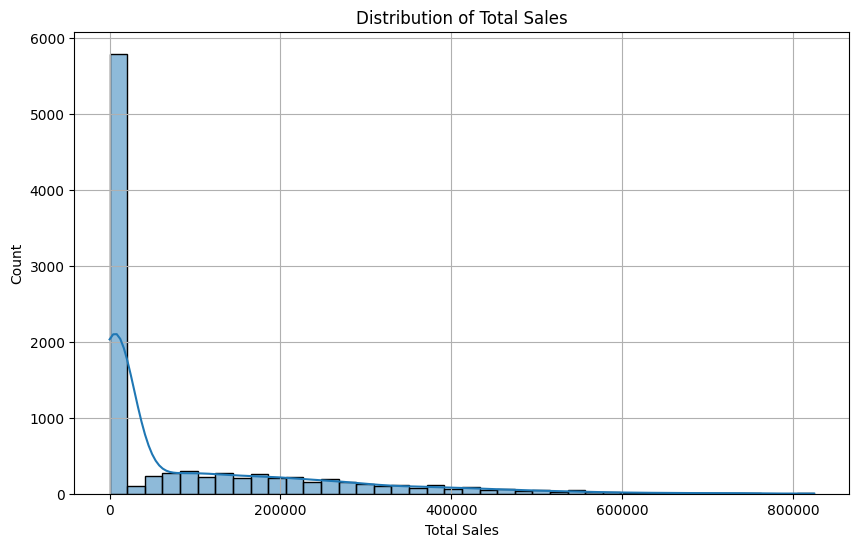

In [ ]:
sns.histplot(df['Total Sales'], bins=40, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales"); plt.ylabel("Count")
plt.show()


# **2.2 Histogram – Units Sold**


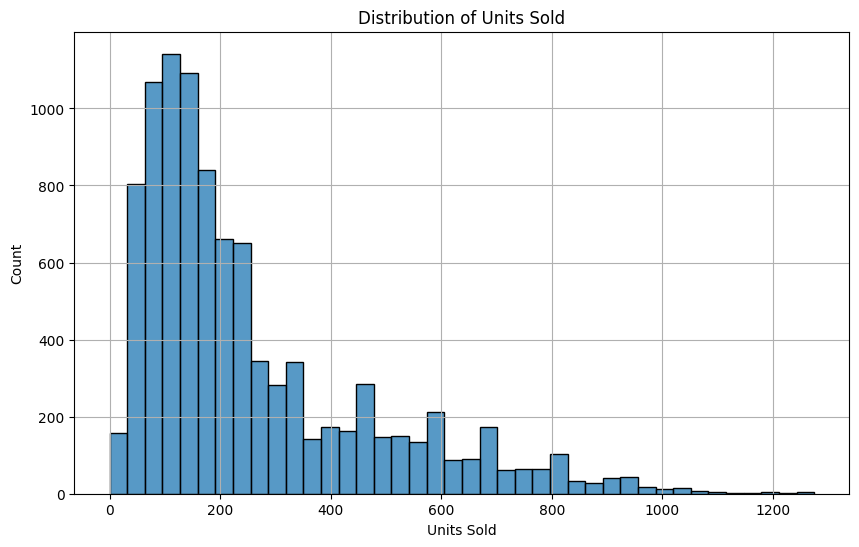

In [ ]:
sns.histplot(df['Units Sold'], bins=40, kde=False)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold"); plt.ylabel("Count")
plt.show()


# **2.3 Boxplot – Operating Profit**

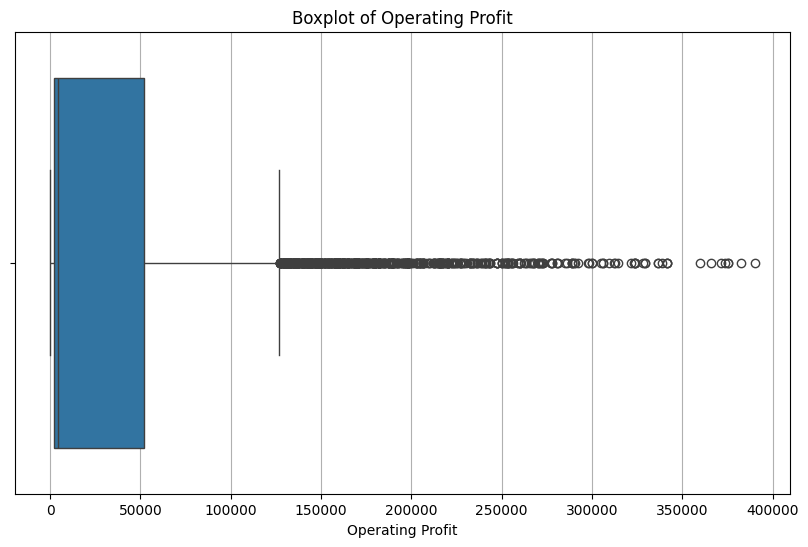

In [ ]:
sns.boxplot(x=df['Operating Profit'])
plt.title("Boxplot of Operating Profit")
plt.xlabel("Operating Profit")
plt.show()


# 3) Univariate — categorical counts
#* 3.1 Countplot – Sales Method *

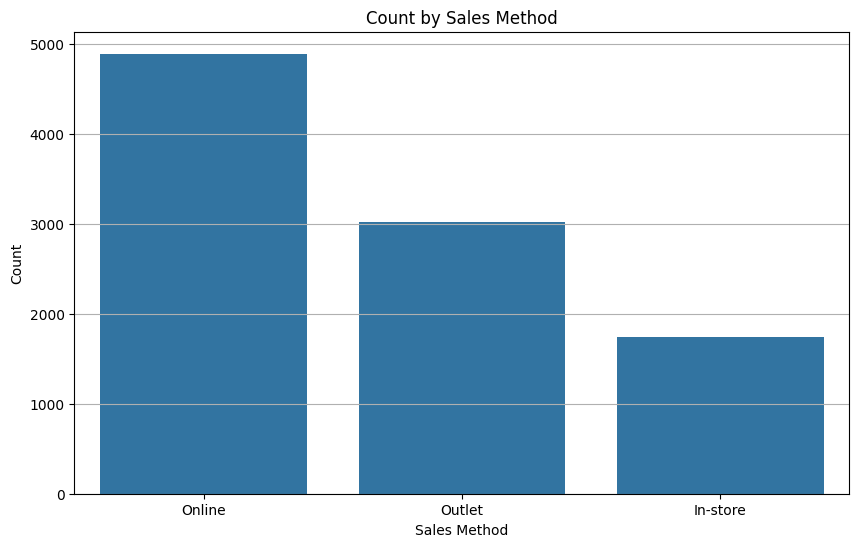

In [ ]:
sns.countplot(x='Sales Method', data=df, order=df['Sales Method'].value_counts().index)
plt.title("Count by Sales Method")
plt.xlabel("Sales Method"); plt.ylabel("Count")
plt.show()


**3.2 Top 10 Product Categories by count**

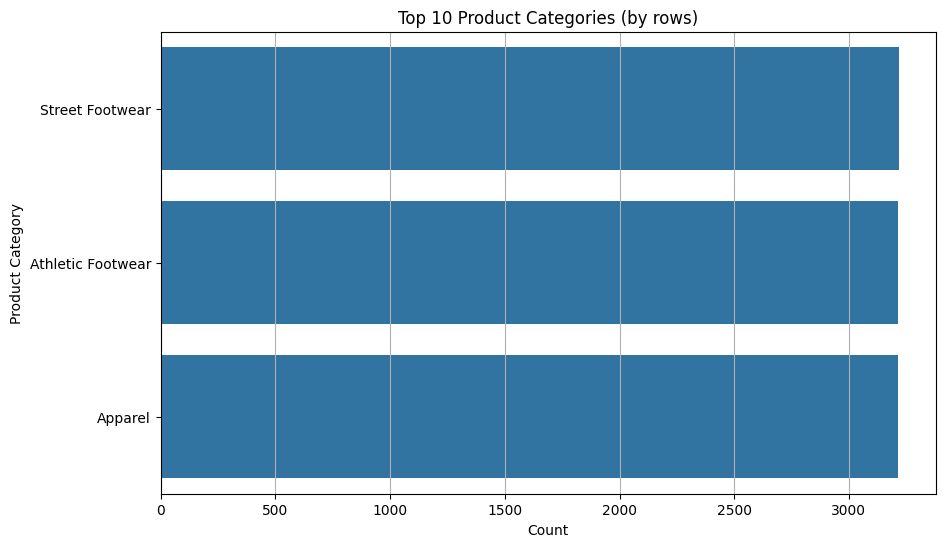

In [ ]:
top_pc = df['Product Category'].value_counts().head(10).index
sns.countplot(y='Product Category', data=df[df['Product Category'].isin(top_pc)],
              order=top_pc)
plt.title("Top 10 Product Categories (by rows)")
plt.xlabel("Count"); plt.ylabel("Product Category")
plt.show()


3.3 Top Regions by row count

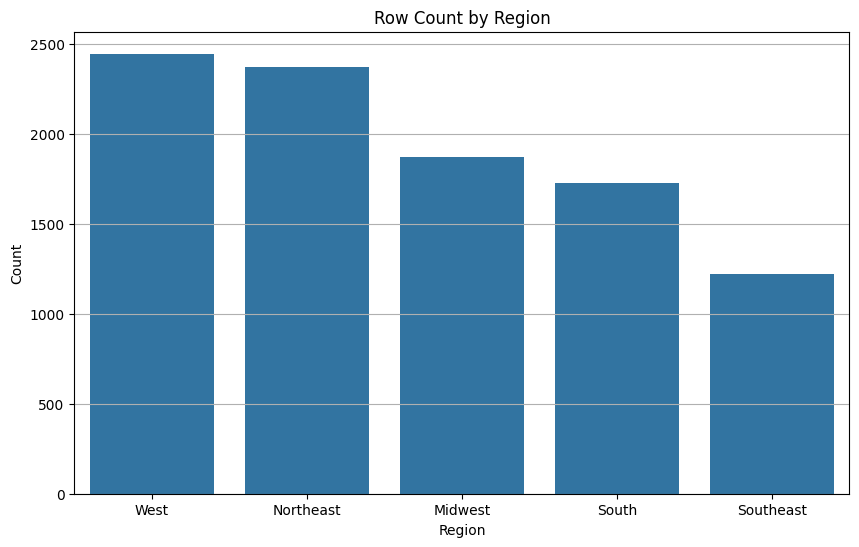

In [ ]:
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().index)
plt.title("Row Count by Region")
plt.xlabel("Region"); plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# **4) Time trends**
# *4.1 Monthly Total Sales trend (across all years)*

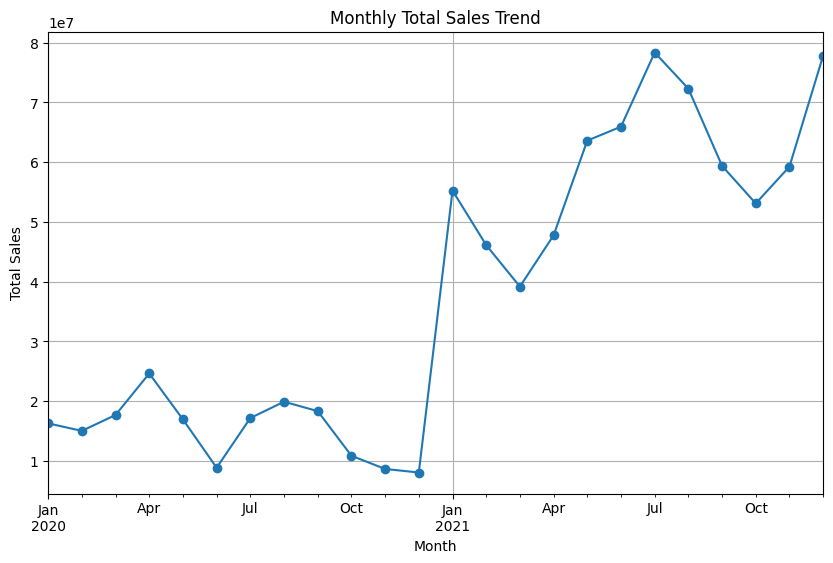

In [ ]:
monthly = (df
           .groupby([df['Invoice Date'].dt.to_period('M')])['Total Sales']
           .sum()
           .sort_index())
monthly.index = monthly.index.to_timestamp()
monthly.plot(marker='o')
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month"); plt.ylabel("Total Sales")
plt.show()


# **4.2 Monthly trend by Sales Method (lines)**

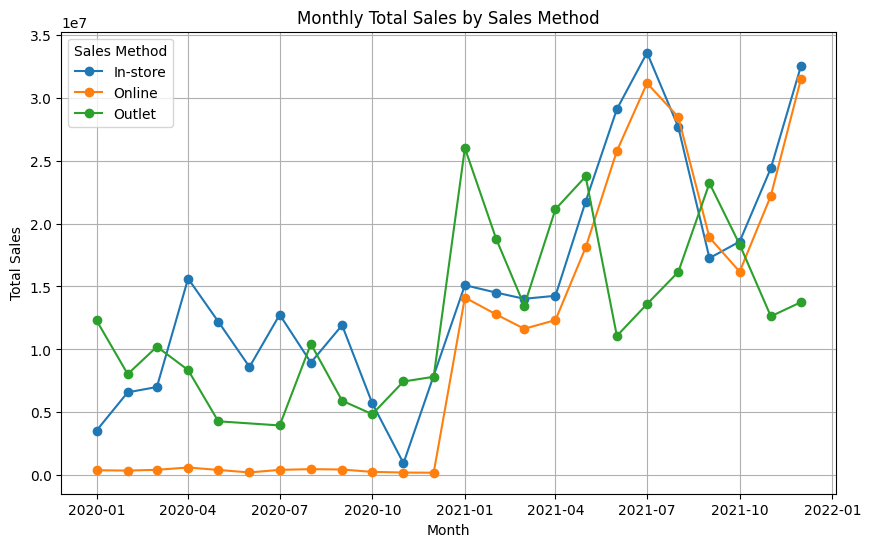

In [ ]:
tmp = df.copy()
tmp['MonthPeriod'] = tmp['Invoice Date'].dt.to_period('M')
line_df = tmp.groupby(['MonthPeriod','Sales Method'])['Total Sales'].sum().reset_index()
line_df['MonthPeriod'] = line_df['MonthPeriod'].dt.to_timestamp()

for method, sub in line_df.groupby('Sales Method'):
    plt.plot(sub['MonthPeriod'], sub['Total Sales'], marker='o', label=method)
plt.legend(title='Sales Method')
plt.title("Monthly Total Sales by Sales Method")
plt.xlabel("Month"); plt.ylabel("Total Sales")
plt.show()


# **5) Bivariate relationships**
***5.1 Scatter – Units Sold vs Total Sales***

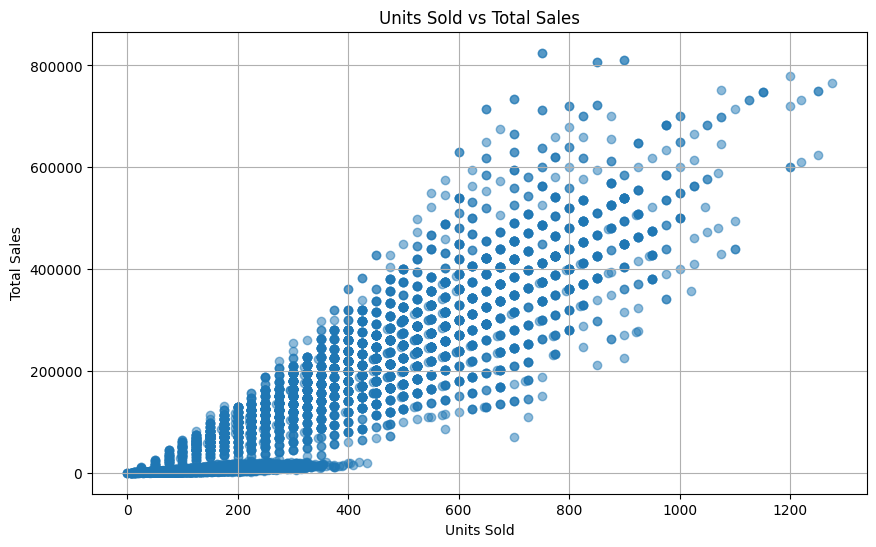

In [ ]:
plt.scatter(df['Units Sold'], df['Total Sales'], alpha=0.5)
plt.title("Units Sold vs Total Sales")
plt.xlabel("Units Sold"); plt.ylabel("Total Sales")
plt.show()


# **5.2 Boxplot – Total Sales by Region**

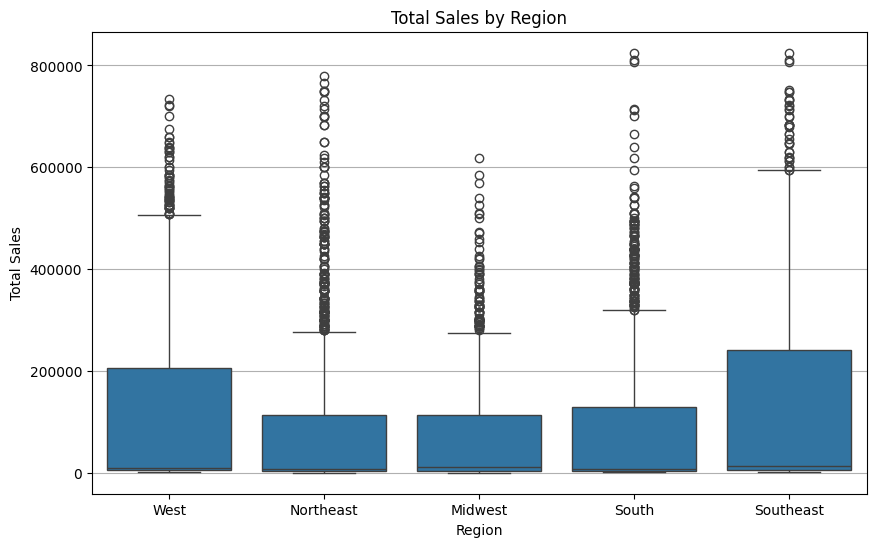

In [ ]:
sns.boxplot(x='Region', y='Total Sales', data=df, order=df['Region'].value_counts().index)
plt.title("Total Sales by Region")
plt.xlabel("Region"); plt.ylabel("Total Sales")
plt.show()


# **5.3 Bar – Mean Operating Margin by Sales Method**

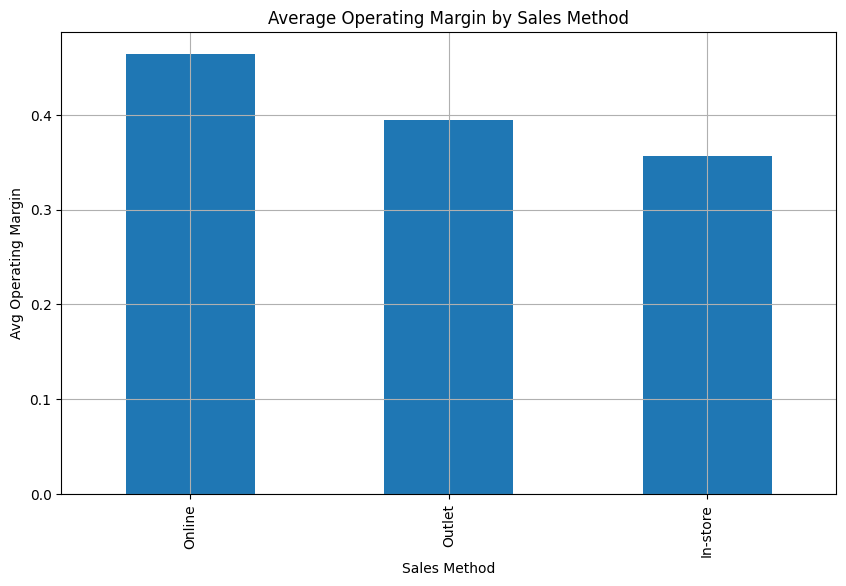

In [ ]:
mean_margin = df.groupby('Sales Method')['Operating Margin'].mean().sort_values(ascending=False)
mean_margin.plot(kind='bar')
plt.title("Average Operating Margin by Sales Method")
plt.xlabel("Sales Method"); plt.ylabel("Avg Operating Margin")
plt.show()


# *5.4 Bar – Total Sales by Product Category (Top 10)*

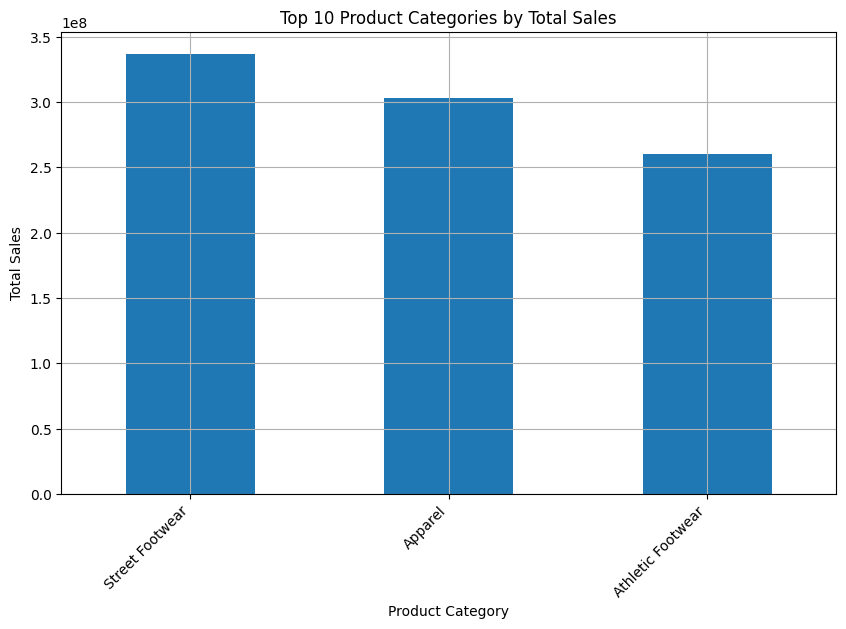

In [ ]:
sales_pc = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False).head(10)
sales_pc.plot(kind='bar')
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Product Category"); plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()


# **5.5 Violin Plot for Retailer vs Total sales**

/tmp/ipython-input-2745064709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Retailer', y='Total Sales', data=df, palette="pastel")


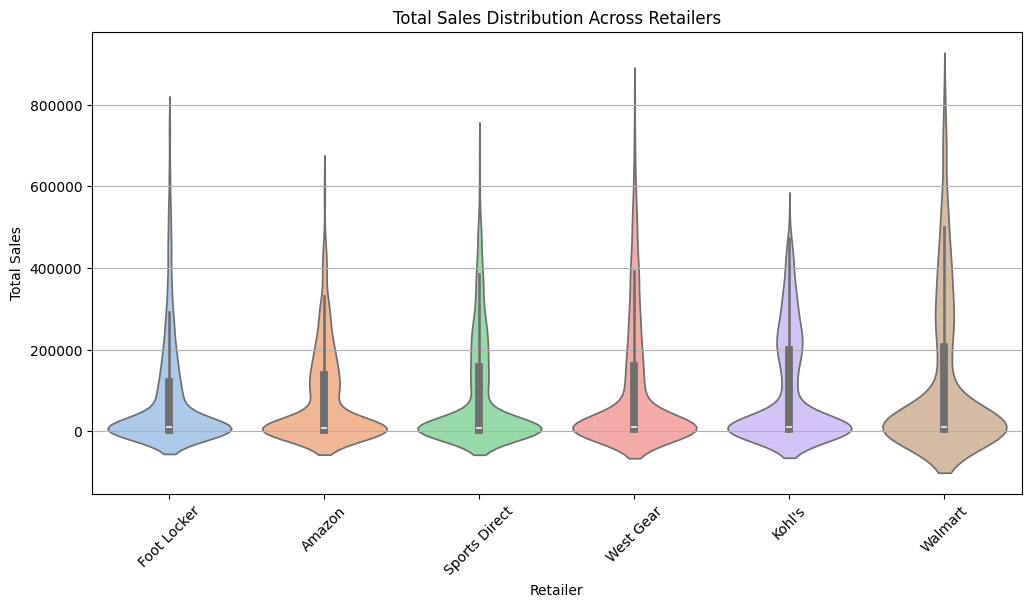

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Retailer', y='Total Sales', data=df, palette="pastel")
plt.title("Total Sales Distribution Across Retailers")
plt.xlabel("Retailer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


***6) Correlations (numeric)***

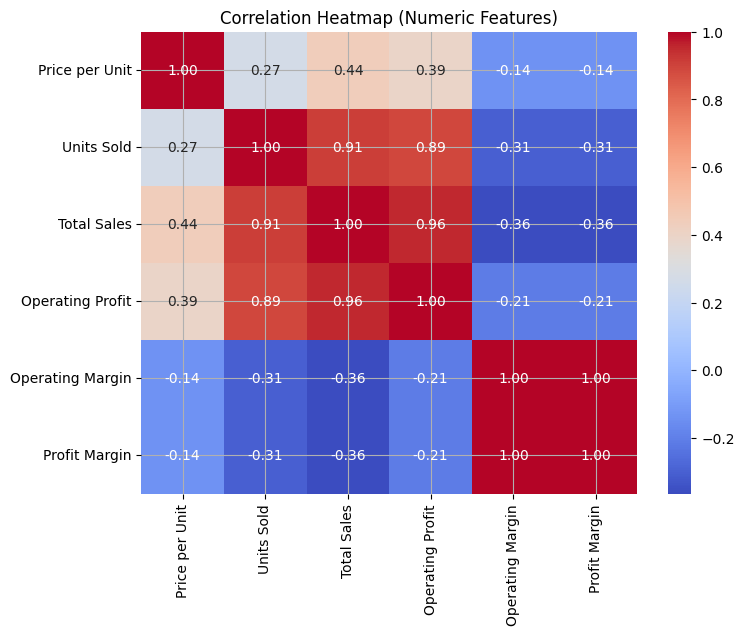

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create Profit Margin column safely (avoid division by zero)
df["Profit Margin"] = df["Operating Profit"] / df["Total Sales"].replace(0, np.nan)

# Select numeric columns
num_cols = ['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin','Profit Margin']

# Compute correlation
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



# **7) Multivariate views**
## ***7.1 Stacked bar – Region × Sales Method (share of total sales)***

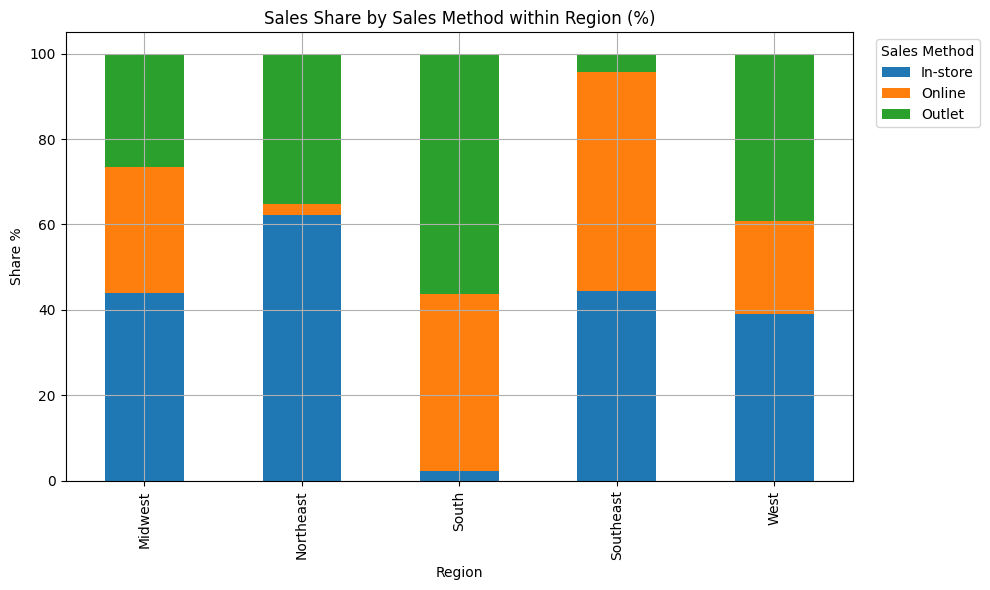

In [ ]:
piv = (df.pivot_table(index='Region', columns='Sales Method', values='Total Sales', aggfunc='sum')
         .fillna(0))
(piv.div(piv.sum(axis=1), axis=0) * 100).plot(kind='bar', stacked=True)
plt.title("Sales Share by Sales Method within Region (%)")
plt.ylabel("Share %"); plt.xlabel("Region")
plt.legend(title='Sales Method', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


7.2 Heatmap – Month vs Product Category (Total Sales)

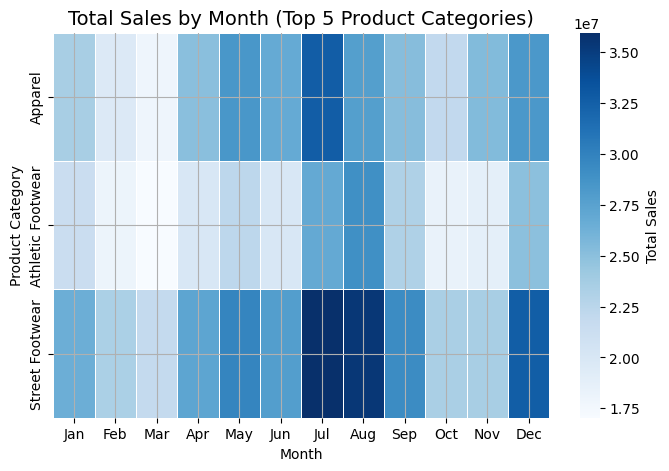

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Invoice Date to datetime & extract month name
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Month'] = df['Invoice Date'].dt.strftime('%b')  # Jan, Feb, Mar...

# Keep only top 5 product categories by total sales
top_categories = df.groupby('Product Category')['Total Sales'].sum().nlargest(5).index
df_top = df[df['Product Category'].isin(top_categories)]

# Pivot table
heat = df_top.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Sales',
    aggfunc='sum'
)

# Reorder months properly
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heat = heat.reindex(columns=months_order)

# Plot heatmap without numbers
plt.figure(figsize=(8,5))
sns.heatmap(heat, cmap='Blues', cbar_kws={'label':'Total Sales'}, annot=False, linewidths=.5)
plt.title("Total Sales by Month (Top 5 Product Categories)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Product Category")
plt.show()


# 7.3 Pairplot (sample) – numeric features colored by Sales Method

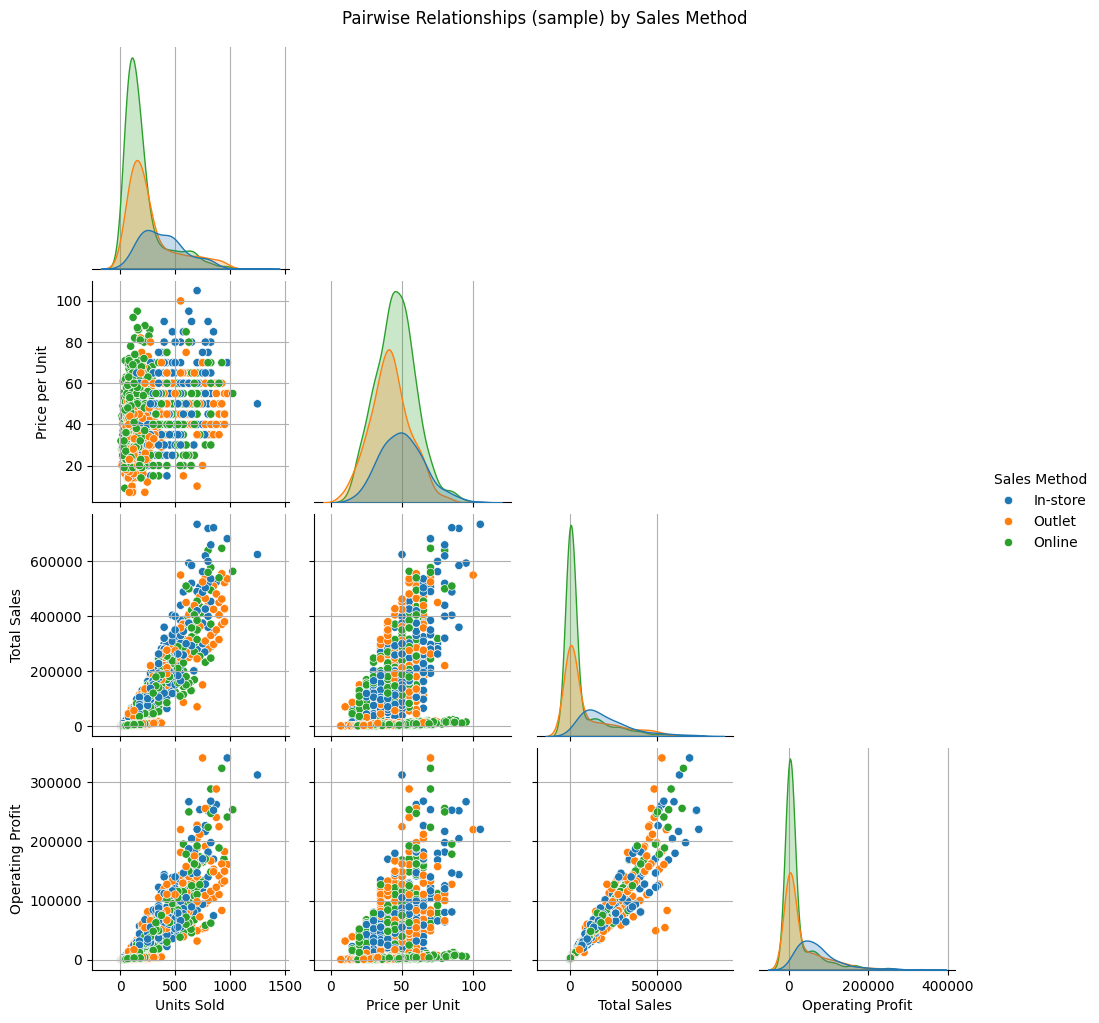

In [ ]:
sample = df.sample(min(1500, len(df)), random_state=42)  # to keep it light
sns.pairplot(sample, vars=['Units Sold','Price per Unit','Total Sales','Operating Profit'],
             hue='Sales Method', corner=True)
plt.suptitle("Pairwise Relationships (sample) by Sales Method", y=1.02)
plt.show()


# 8) City / Retailer rollups
*8.1 Top 15 Cities by Total Sales*

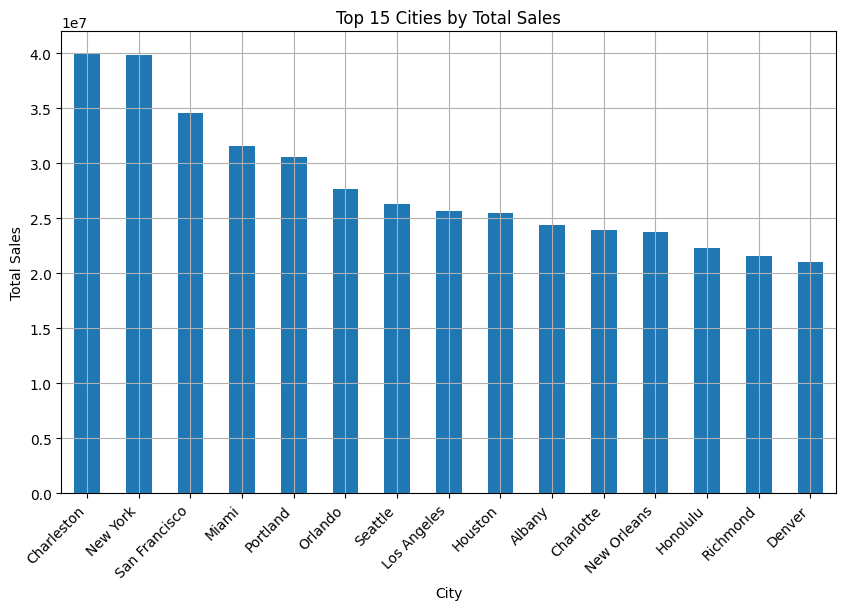

In [ ]:
city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(15)
city_sales.plot(kind='bar')
plt.title("Top 15 Cities by Total Sales")
plt.xlabel("City"); plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()


# 9.  **Skewness Analysis for  Total Sales, Price per unit and  OperatingProfit**

In [ ]:
# Check skewness for Total Sales, Price per unit, and Operating Profit
skewness = df[['Total Sales', 'Price per Unit', 'Operating Profit']].skew()

# Display the skewness values
print(skewness)


Total Sales         1.841359
Price per Unit      0.362445
Operating Profit    2.233598
dtype: float64


Skewness of selected columns:
Total Sales         1.841359
Price per Unit      0.362445
Operating Profit    2.233598
dtype: float64

Summary Statistics (Mean, Median, Mode):

Total Sales:
  Mean: 93273.44
  Median: 9576.00
  Mode: 100000.00

Price per Unit:
  Mean: 45.22
  Median: 45.00
  Mode: 50.00

Operating Profit:
  Mean: 34425.24
  Median: 4371.42
  Mode: 63000.00


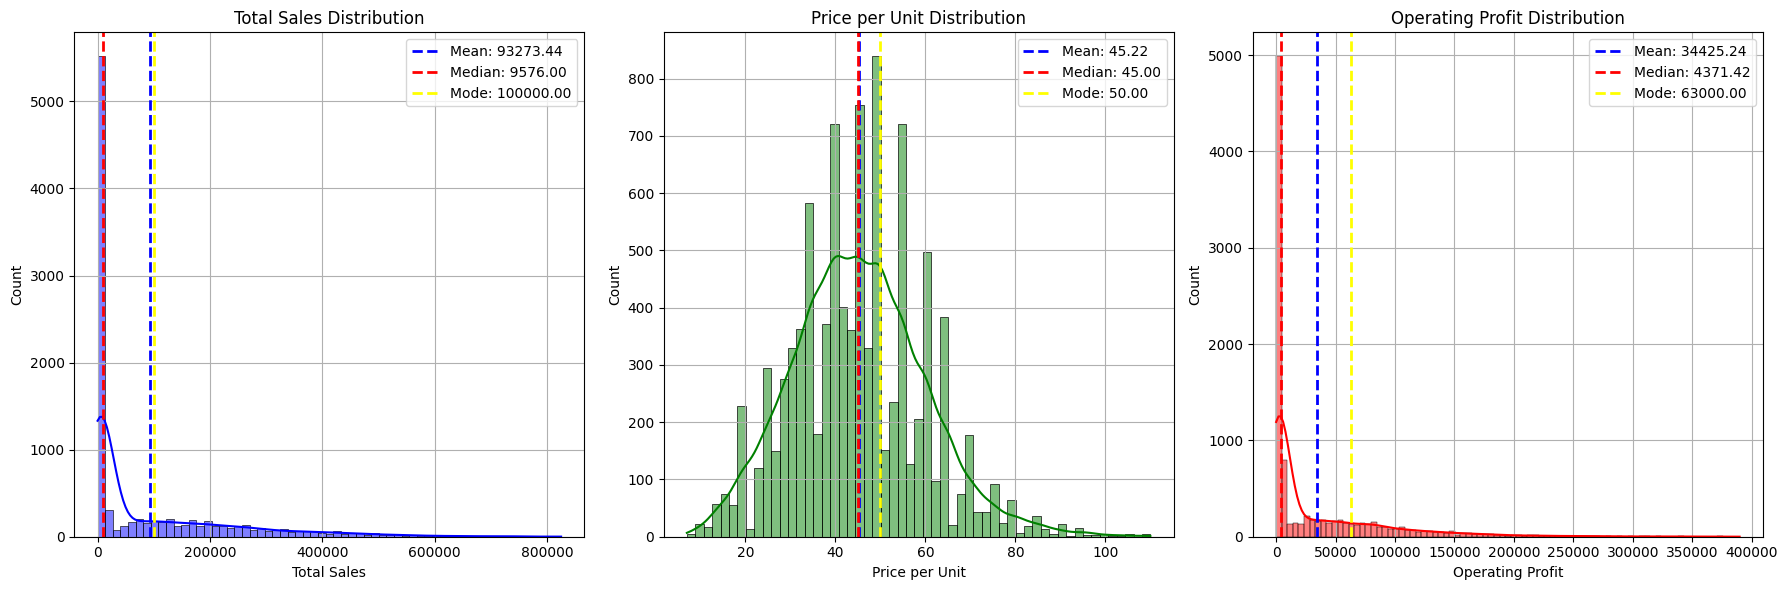

In [ ]:
# --- Skewness Analysis for Adidas Dataset ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# If not already loaded, upload your file in Colab
# from google.colab import files; uploaded = files.upload()
# df = pd.read_excel("AdidasSalesdata (1).xlsx")

# Load the dataset (assuming the file is already uploaded)
try:
    df = pd.read_excel("AdidasSalesdata (1).xlsx")
except FileNotFoundError:
    print("Error: 'AdidasSalesdata (1).xlsx' not found. Please upload the file.")
    # You might want to exit or handle this case differently
    exit()


# Select relevant columns
cols = ['Total Sales', 'Price per Unit', 'Operating Profit']

# 1. Skewness values
skewness = df[cols].skew()
print("Skewness of selected columns:")
print(skewness)

# 2. Mean, Median, Mode for each column
summary_stats = {}
for col in cols:
    # Handle cases where all values are the same for mode
    mode_val = df[col].mode()
    summary_stats[col] = {
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": mode_val[0] if not mode_val.empty else None
    }

print("\nSummary Statistics (Mean, Median, Mode):")
for col, stats in summary_stats.items():
    print(f"\n{col}:")
    for k, v in stats.items():
        if v is not None:
             print(f"  {k}: {v:.2f}")
        else:
             print(f"  {k}: N/A")


# 3. Histograms with Mean, Median, Mode
plt.figure(figsize=(18, 6))

# Total Sales
plt.subplot(1, 3, 1)
sns.histplot(df['Total Sales'], kde=True, color='blue')
plt.axvline(summary_stats['Total Sales']['Mean'], color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {summary_stats['Total Sales']['Mean']:.2f}")
plt.axvline(summary_stats['Total Sales']['Median'], color='red', linestyle='dashed', linewidth=2, label=f"Median: {summary_stats['Total Sales']['Median']:.2f}")
if summary_stats['Total Sales']['Mode'] is not None:
    plt.axvline(summary_stats['Total Sales']['Mode'], color='yellow', linestyle='dashed', linewidth=2, label=f"Mode: {summary_stats['Total Sales']['Mode']:.2f}")
plt.title("Total Sales Distribution")
plt.legend()

# Price per Unit
plt.subplot(1, 3, 2)
sns.histplot(df['Price per Unit'], kde=True, color='green')
plt.axvline(summary_stats['Price per Unit']['Mean'], color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {summary_stats['Price per Unit']['Mean']:.2f}")
plt.axvline(summary_stats['Price per Unit']['Median'], color='red', linestyle='dashed', linewidth=2, label=f"Median: {summary_stats['Price per Unit']['Median']:.2f}")
if summary_stats['Price per Unit']['Mode'] is not None:
    plt.axvline(summary_stats['Price per Unit']['Mode'], color='yellow', linestyle='dashed', linewidth=2, label=f"Mode: {summary_stats['Price per Unit']['Mode']:.2f}")
plt.title("Price per Unit Distribution")
plt.legend()

# Operating Profit
plt.subplot(1, 3, 3)
sns.histplot(df['Operating Profit'], kde=True, color='red')
plt.axvline(summary_stats['Operating Profit']['Mean'], color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {summary_stats['Operating Profit']['Mean']:.2f}")
plt.axvline(summary_stats['Operating Profit']['Median'], color='red', linestyle='dashed', linewidth=2, label=f"Median: {summary_stats['Operating Profit']['Median']:.2f}")
if summary_stats['Operating Profit']['Mode'] is not None:
    plt.axvline(summary_stats['Operating Profit']['Mode'], color='yellow', linestyle='dashed', linewidth=2, label=f"Mode: {summary_stats['Operating Profit']['Mode']:.2f}")
plt.title("Operating Profit Distribution")
plt.legend()

plt.tight_layout()
plt.show()